# Use Astropy to analyze FITS images

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Open the FITS file

In [2]:
fname = "Horsehead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: Horsehead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list

In [3]:
image_data = hdu_list[0].data

In [4]:
header = hdu_list[0].header

In [5]:
print(header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

### Our data is now stored as a 2-D numpy array. But how do we know the dimensions of the image? We can simply look at the shape of the array.

In [6]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### At this point, we can close the FITS file bc we've stored everything we wanted to a variable.

In [7]:
hdu_list.close()

### Shortct: Use "getdata()" to just read in the image data and close the file.

In [8]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### Show the data

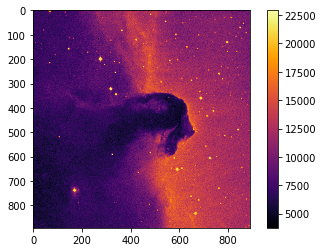

In [23]:
plt.imshow(image_data, cmap='inferno')
plt.colorbar()

### Let's get some basic statistics about our image

In [11]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


### Plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), we'll need to cast the data from a 2-D array to something one dimensional.

In this case, let's use the ndarray.flatten() to return a 1-D numpy array

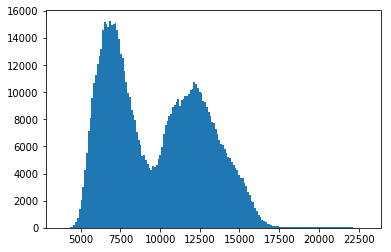

In [24]:
histogram = plt.hist(image_data.flatten(), bins='auto')

### Displaying thw image with a logarithmic scale
What if we want to use a logarithmic color scale? To do so, we can load the LogNorm object from matplotlib.

In [25]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

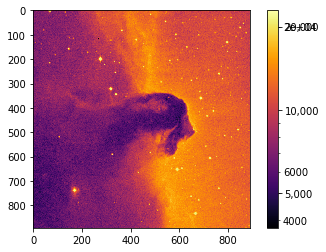

In [29]:
plt.imshow(image_data, cmap='inferno', norm=LogNorm())

#Choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

### Stacking Images
Since the noise in an image results from a random process, we use stacking of seperaate images to improve the signal noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 inch telescope

In [30]:
#make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits',\
             'M13_blue_0004.fits','M13_blue_0005.fits']

In [31]:
#make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [32]:
#sum the images together
final_image = np.sum(image_concat, axis=0)

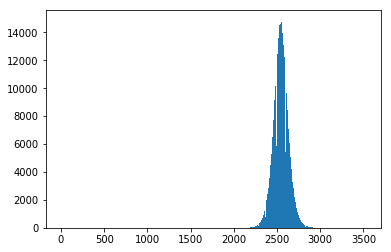

In [33]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

We'll use the keywords vmin and vmax to set limits on the color scaling for imshow

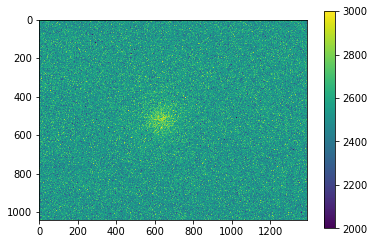

In [39]:
plt.imshow(final_image, cmap='viridis', vmin=2E3, vmax=3E3)
plt.colorbar()

### Writing a new FITS file
We can easily do this with the writeo() method

Warning: You'll  receive an error if the file you are trying to write already exists. That's why we've set clobber=True

In [40]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)